# Лабораторная работа - Корреляционный анализ в Python


### Цели

* Часть 1: Набор данных
* Часть 2: Диаграммы рассеяния и корреляционные переменные
* Часть 3: Расчёт корреляции с Python
* Часть 4: Визуализация

### История / Cценарий

Корреляция является важной статистической зависимостью, которая может указывать, связаны ли линейные значения переменных.

В этой лабораторной работе вы узнаете, как использовать Python для расчета корреляции. В Части 1 Вы подготовите набор данных. В Части 2 Вы узнаете, как определить, являются ли переменные в данном наборе данных взаимозависимыми. Наконец, в Части 3, Вы будете использовать Python для вычисления корреляции между двумя наборами переменных.

### Необходимо:
* Библиотеки Python: pandas, numpy, matplotlib, seaborn
* Файл данных: brainsize.txt

## Часть 1: Набор данных

Вы будете использовать набор данных, который содержит выборку 40 студентов правшей с вводного курса по Психологии из университета Southwestern. Испытуемые прошли четыре субтеста (Vocabulary, Similarities, Block Design, и Picture Completion) для расчёта шкалы интеллекта взрослых по Векслеру. Исследователи использовали магнитно-резонансную томографию (МРТ) для определения размера мозга у субъектов. Также включены сведения о гендерных показателях и размере тела (рост и вес). Исследователи скрыли вес двух испытуемых и высоту одного из них по причинам конфиденциальности.
Для набора данных были применены две простые модификации:

1. Заменены вопросительные знаки, используемые для представления скрытых данных, описанных выше, строкой «NaN». Замена была выполнена, потому что Pandas не обрабатывает вопросительные знаки правильно.

2. Заменены все символы табуляции запятыми, преобразуя набор данных в набор данных CSV.

Готовый набор данных сохранён как `brainsize.txt`.

#### Шаг 1: Загрузка набора данных из файла.

До того, как набор данных можно использовать, он должен быть загружен в память.

В приведенном ниже коде первая строка импортирует модули `pandas` и определяет `pd` как дескриптор, который ссылается на один из модулей.

Вторая строка загружает CSV-файл набора данных в переменную с именем `brainFile`.

Третья строка использует метод `read_csv()` из библиотеки `pandas`, чтобы преобразовать набор данных CSV, хранящийся в `brainFile` в кадр данных. Затем кадр данных хранится в переменной `brainFrame`.

Запустите ячейку ниже, чтобы выполнить описанные функции.

In [3]:
import pandas as pd
brainFrame = pd.read_csv('brainsize.txt', delimiter='\t')

#### Шаг 2. Проверка кадра данных.

Чтобы убедиться, что кадр данных правильно загружен и создан, используйте метод `head()`. Метод `head()` отображает первые пять записей в кадре данных.

In [5]:
brainFrame.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


Метод head() принимает параметр - число строк, отобразите первые 10 строк таблицы

In [6]:
brainFrame.head(10)

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545
5,Female,99,90,110,146.0,69.0,928799
6,Female,138,136,131,138.0,64.5,991305
7,Female,92,90,98,175.0,66.0,854258
8,Male,89,93,84,134.0,66.3,904858
9,Male,133,114,147,172.0,68.8,955466


Также Dataframe имеет метод tail(), который возвращает последние 5 строк кадра данных. Аналогично head() метод tail() принимает аргументом число строк, которые он вернет. Отобразите последние 8 строк таблицы.

In [7]:
brainFrame.tail(8)

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
32,Male,103,96,110,192.0,75.5,997925
33,Male,90,96,86,181.0,69.0,879987
34,Female,83,90,81,143.0,66.5,834344
35,Female,133,129,128,153.0,66.5,948066
36,Male,140,150,124,144.0,70.5,949395
37,Female,88,86,94,139.0,64.5,893983
38,Male,81,90,74,148.0,74.0,930016
39,Male,89,91,89,179.0,75.5,935863


## Часть 2: Диаграммы рассеяния и корреляционные переменные

#### Шаг 1: метод `describe()` в библиотеке pandas.
Библиотека pandas включает в себя метод `describe()`, который выполняет одни и те же общие вычисления на предложенном наборе данных. Помимо базовых операций таких, как подсчёт, расчёт среднего значения, расчёт среднеквадратического отклонения, расчёт минимума, и максимума,  `describe()` также отличный способ быстро проверить достоверность значений в кадре данных.<p>
Ниже используйте функцию describe, для вывода статистики по данным

In [8]:
brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


#### Шаг 2: Диаграммы рассеяния

Диаграммы рассеяния важны при работе с корреляциями, поскольку они позволяют быстро визуально проверить природу связи между переменными. В этой лабораторной работе используется коэффициент корреляции Пирсона, который чувствителен только к линейной зависимости между двумя переменными. Также существуют другие более надежные методы корреляции, но они выходят за рамки этой лабораторной работы.

##### a. Загрузите необходимые модули.
Прежде чем строить графики, необходимо импортировать несколько модулей, а именно `numpy` и `matplotlib`. Запустите ячейку ниже, чтобы загрузить эти модули.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

##### b. Разделите данные.
Чтобы гарантировать, что результаты не будут искажены из-за различий в мужских и женских телах, кадр данных разбит на два: один содержит все мужские записи, а другой - только женские экземпляры. <p>
Создайте два новых кадра данных: menDf и womenDf, каждый из которых содержит соответствующие записи.

In [10]:
menDf = brainFrame[brainFrame['Gender'] == 'Male']
womenDf = brainFrame[brainFrame['Gender'] == 'Female']

##### c. Постройте графики.
Поскольку набор данных включает в себя три различных измерения интеллекта (PIQ, FSIQ и VIQ), первая строка ниже использует метод `mean()` из библиотеки Pandas для вычисления среднего значения между тремя измерениями и сохранения результата в переменной `menMeanSmarts`. Обратите внимание, что первая строка относится к menDf, отфильтрованному кадру данных, содержащему только мужские записи.<p>
Вторая строка использует метод `scatter()` библиотеки `matplotlib` для создания графика диаграммы рассеяния между переменной `menMeanSmarts` и атрибутом `MRI_Count`. MRI_Count в этом наборе данных можно рассматривать как меру физического размера мозга испытуемых.<p>
Третья строка просто отображает график.<p>
Четвертая строка используется для гарантированного отображения графика в этом блокноте.

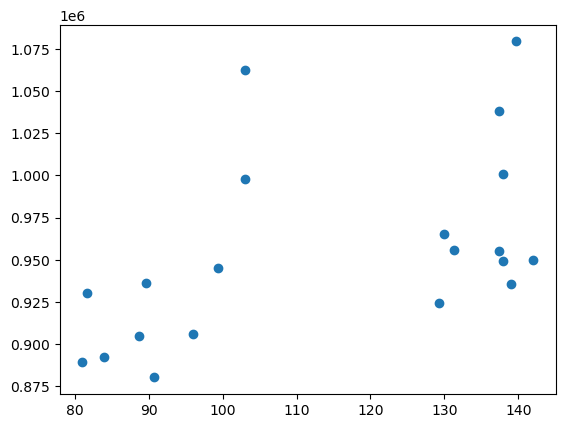

In [11]:
# Ячейка для кода № 6
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.show()
%matplotlib inline

Аналогичным образом создайте график диаграммы рассеяния для кадра данных, содержащему только женские записи.

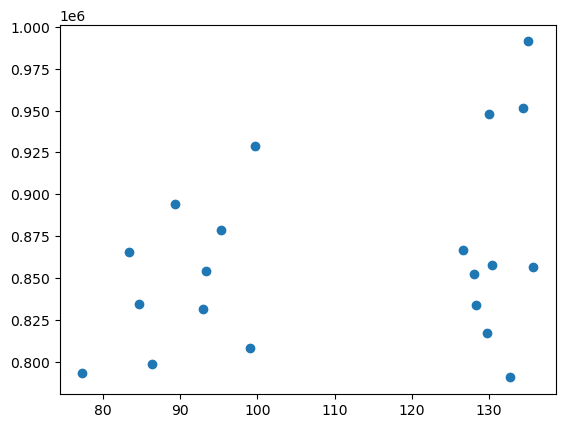

In [12]:
# Ячейка для кода № 7
# Постройка графика диаграммы рассеяния для кадра данных с женскими записями
womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])
plt.show()
%matplotlib inline
#
#

## Часть 3: Вычисление корреляции с Python


#### Шаг 1: Рассчитайте корреляцию для brainFrame.
Метод `corr()` библиотеки pandas обеспечивает простой способ вычисления корреляции для кадра данных. Просто применяя метод на кадре данных, можно получить корреляцию между всеми переменными одновременно.

In [16]:
# Сохраните оригинальный DataFrame без изменений
# Выберите только числовые столбцы для расчета корреляции
numeric_df = brainFrame.select_dtypes(include=['number'])

# Рассчитайте корреляцию
correlation_matrix = numeric_df.corr(method='pearson')

print(correlation_matrix)


               FSIQ       VIQ       PIQ    Weight    Height  MRI_Count
FSIQ       1.000000  0.946639  0.934125 -0.051483 -0.086002   0.357641
VIQ        0.946639  1.000000  0.778135 -0.076088 -0.071068   0.337478
PIQ        0.934125  0.778135  1.000000  0.002512 -0.076723   0.386817
Weight    -0.051483 -0.076088  0.002512  1.000000  0.699614   0.513378
Height    -0.086002 -0.071068 -0.076723  0.699614  1.000000   0.601712
MRI_Count  0.357641  0.337478  0.386817  0.513378  0.601712   1.000000


Обратите внимание на диагональ слева направо в таблице корреляции, сгенерированной выше. Почему диагональ заполнена значениями 1? Это совпадение? Объясните.

Это связано с тем, что корреляция каждой переменной с самой собой всегда равна 1.

Продолжая смотреть на таблицу корреляции выше, обратите внимание, что значения зеркалируются; значения под диагональю имеют зеркальный аналог над ней. Это совпадение? Объясните.

Зеркальное отображение значений в таблице корреляции — это следствие симметричности корреляции и не является совпадением.  Корреляция между двумя переменными, скажем, X и Y, определяется одинаково, независимо от порядка переменных.

Используя тот же метод `corr()`, вычислите корреляцию переменных, содержащихся в кадре с женскими записями:

In [18]:

# Выбор только числовых столбцов
numeric_womenDf = womenDf.select_dtypes(include=['number'])

# Вычисление корреляции с использованием метода Пирсона
correlation_matrix = numeric_womenDf.corr(method='pearson')

# Вывод матрицы корреляции
print(correlation_matrix)


               FSIQ       VIQ       PIQ    Weight    Height  MRI_Count
FSIQ       1.000000  0.955717  0.939382  0.038192 -0.059011   0.325697
VIQ        0.955717  1.000000  0.802652 -0.021889 -0.146453   0.254933
PIQ        0.939382  0.802652  1.000000  0.113901 -0.001242   0.396157
Weight     0.038192 -0.021889  0.113901  1.000000  0.552357   0.446271
Height    -0.059011 -0.146453 -0.001242  0.552357  1.000000   0.174541
MRI_Count  0.325697  0.254933  0.396157  0.446271  0.174541   1.000000


И то же самое можно сделать для переменных, содержащихся в кадре с мужскими записями:

In [19]:
# Используйте corr() для расчёта критерия корреляции Пирсона для кадра данных с мужчинами
# Выбор только числовых столбцов
numeric_menDf = menDf.select_dtypes(include=['number'])

# Вычисление корреляции с использованием метода Пирсона
correlation_matrix = numeric_menDf.corr(method='pearson')

# Вывод матрицы корреляции
print(correlation_matrix)

               FSIQ       VIQ       PIQ    Weight    Height  MRI_Count
FSIQ       1.000000  0.944400  0.930694 -0.278140 -0.356110   0.498369
VIQ        0.944400  1.000000  0.766021 -0.350453 -0.355588   0.413105
PIQ        0.930694  0.766021  1.000000 -0.156863 -0.287676   0.568237
Weight    -0.278140 -0.350453 -0.156863  1.000000  0.406542  -0.076875
Height    -0.356110 -0.355588 -0.287676  0.406542  1.000000   0.301543
MRI_Count  0.498369  0.413105  0.568237 -0.076875  0.301543   1.000000


## Часть 4: Визуализация

#### Шаг 1: Установите Seaborn.
Чтобы упростить визуализацию корреляций данных, можно использовать тепловую карту. На основе цветных квадратов тепловая карта может помочь выявить корреляции с первого взгляда.

Модуль Python с именем `seaborn` очень упрощает построение тепловых карт.

Сначала запустите ячейку ниже, чтобы загрузить и установить модуль `seaborn`. (закомментируйте, если библиотека установлена)

In [20]:
# Ячейка для кода № 11
!pip install seaborn

#### Шаг 2: Нарисуйте корреляционную тепловую карту.

Теперь, когда кадры данных готовы, можно отобразить тепловые карты. Далее приведен анализ кода из ячейки ниже:

Строка 1: Создает таблицу корреляции, основанную на фрейме данных `womenNoGenderDf` и хранит его в `wcorr`.<br>
Строка 2: Использует метод `heatmap()` библиотеки `seaborn` для генерации и построения тепловой карты. Обратите внимание, что `heatmap()` принимает `wcorr`, как параметр.<br>
Строка 3: используется для экспорта и сохранения созданной тепловой карты в виде PNG-изображения. Хотя строка 3 не активна (перед ней стоит символ `#`, заставляя интерпретатор игнорировать ее), она сохранена в информационных целях.

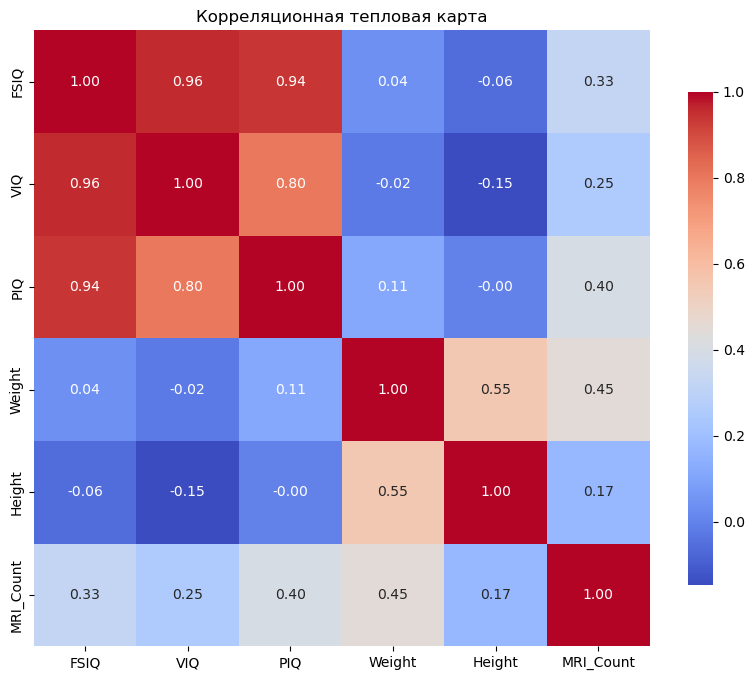

In [24]:
# Ячейка для кода № 12


numeric_womenDf = womenDf.select_dtypes(include=['number'])

# Шаг 2: Вычисление корреляции
wcorr = numeric_womenDf.corr(method='pearson')

# Шаг 3: Построение тепловой карты
plt.figure(figsize=(10, 8))  # Задайте размер фигуры по желанию
sns.heatmap(wcorr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляционная тепловая карта')
plt.show()
#plt.savefig('attribute_correlations.png', tight_layout=True)

Аналогичным образом создайте и отобразите тепловую карту для кадра данных с мужчинами.

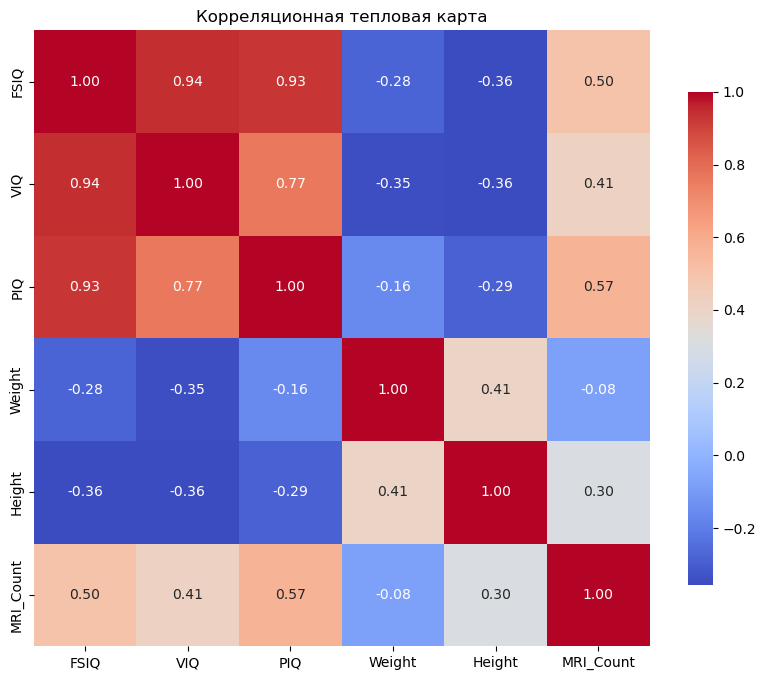

In [25]:
# Ячейка для кода № 14
numeric_menDf = menDf.select_dtypes(include=['number'])

# Шаг 2: Вычисление корреляции
mcorr = numeric_menDf.corr(method='pearson')

# Шаг 3: Построение тепловой карты
plt.figure(figsize=(10, 8))  # Задайте размер фигуры по желанию
sns.heatmap(mcorr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляционная тепловая карта')
plt.show()
#plt.savefig('attribute_correlations.png', tight_layout=True)
#
#

У многих пар переменных корреляция близка к нулю. Что это значит?

Корреляция близка к нулю между парой переменных означает, что между этими переменными отсутствует линейная зависимость. 

Зачем делать разделение по полу?

Разделение по полу позволяет более точно интерпретировать данные и делать выводы, которые учитывают возможные различия между группами, что способствует более глубокому и полному пониманию исследуемых явлений.

Какие переменные имеют более сильную корреляцию с размером мозга (MRI_Count)? Это ожидалось? Объясните.

У мужчин PIQ и FSIQ имеют более сильные корреляции с MRI_Count по сравнению с женщинами. Это может указывать на то, что у мужчин размер мозга более тесно связан с невербальными и общими когнитивными способностями.У женщин наибольшая корреляция с MRI_Count наблюдается с Weight, что является неожиданным, поскольку у мужчин вес показывает негативную корреляцию.Ожидание наличия корреляций между размером мозга и когнитивными показателями (PIQ, FSIQ) подтверждается, но разница в силе корреляций между полами может указывать на различные факторы, влияющие на эти взаимосвязи. Например,социальные, культурные или биологические аспекты могут иметь значение.Положительная корреляция веса с размером мозга у женщин может быть связана с различиями в физическом состоянии или метаболизме, которые могут влиять на развитие мозга.